# Week 2 Homework

#### Investigating the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [507]:
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np


%matplotlib inline

In [508]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

#### EDA

In [509]:
df = pd.read_csv('./housing.csv')

In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [511]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [512]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [513]:
df['ocean_proximity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: ocean_proximity
Non-Null Count  Dtype 
--------------  ----- 
20640 non-null  object
dtypes: object(1)
memory usage: 161.4+ KB


In [514]:
print(df['ocean_proximity'].unique())
print(df['ocean_proximity'].nunique())
df['ocean_proximity'] = df['ocean_proximity'].str.lower().str.replace(' ', '_')

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
5


In [515]:
print(df['median_house_value'].unique())
print(df['median_house_value'].nunique())

[452600. 358500. 352100. ... 425800. 200700.  47000.]
3842


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

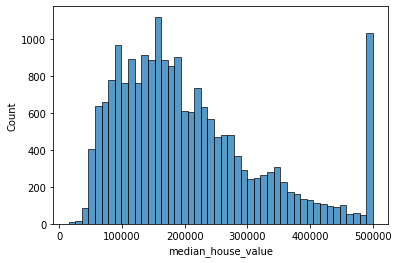

In [516]:
sns.histplot(data=df['median_house_value'])

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

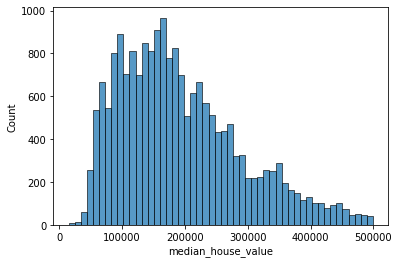

In [517]:
sns.histplot(df.median_house_value[df.median_house_value < 500000], bins=50)

**Median House Value is indeed long-tailed**

#### Features

In [518]:
features = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
]

df = df[features]

In [519]:
df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

### Question 1

In [520]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

total_bedrooms: **207**

### Question 2

In [521]:
df['population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

population 50% median - **1166**

### Split the data

Splitting dataset into train/val/test sets, with 60%/20%/20% distribution.

In [522]:
print(n:= len(df))

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

20640


In [523]:
print(n_val + n_test + n_train)
n_val, n_test, n_train

20640


(4128, 4128, 12384)

Shuffling dataset with seed 42

In [524]:
# Setting indices for shuffling 

idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

In [525]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [526]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Separating target median_house_value and applying log transform

In [527]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [528]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [529]:
len(y_train)

12384

### Question 3

In [530]:
# Defining training function and RMSE from class notes

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

1. Filling with 0s

In [531]:
# Defining function to fill a dataset NaN/empty values with the mean

def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [532]:
# Performing training

X_train_0 = prepare_X(df_train)
w0, w = train_linear_regression(X_train_0, y_train)

X_val_0 = prepare_X(df_val)
y_pred_0 = w0 + X_val_0.dot(w)
rmse(y_val, y_pred_0)

0.329533036522801

2. Filling with mean

In [533]:
# Defining function to fill a dataset NaN/empty values with the mean

def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(df.mean())
    X = df_num.values
    return X

In [534]:
# Performing training

X_train_mean = prepare_X(df_train)
w0, w = train_linear_regression(X_train_mean, y_train)

X_val_mean = prepare_X(df_val)
y_pred_mean = w0 + X_val_mean.dot(w)

Comparing filling with 0s and filling with feature mean

In [535]:
print(f"RMSE when filling with 0:\t {round(rmse(y_val, y_pred_0), 2): > 10}")
print(f"RMSE when filling with mean:\t {round(rmse(y_val, y_pred_mean), 2): > 10}")

RMSE when filling with 0:	       0.33
RMSE when filling with mean:	       0.33


The RMSEs when filling with 0s or the feature mean **are equally good**.

### Question 4

In [536]:
# Defining training function with regularization and RMSE from class notes

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [537]:
rreg = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

rmse_scores = []

print ("{:<8} {:<15} ".format('r', 'RMSE'))
for r in rreg:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    y_pred = w0 + X_val.dot(w)
    rmse_score = round(rmse(y_val, y_pred), 2)
    print ("{:<8} {:<15} ".format(r, rmse_score))
    rmse_scores.append(rmse_score)

r        RMSE            
0        0.33            
1e-06    0.33            
0.0001   0.33            
0.001    0.33            
0.01     0.33            
0.1      0.33            
1        0.33            
5        0.34            
10       0.34            


The min RMSE is 0.33, with the smallest value of r with 0.33 being **0**

### Question 5

Defining function that will handle shuffling with a given seed, and splitting the dataset

In [538]:
def shuffle_split(df, seed):
    n = len(df)
    
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)

    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    return df_train, y_train, df_val, y_val, df_test, y_test

In [539]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

print ("{:<8} {:<15} ".format('Seed', 'RMSE'))
for seed in seeds:
    df_train, y_train, df_val, y_val, df_test, y_test = shuffle_split(df, seed)

    X_train = prepare_X(df_train)   # prepare_X() still fills NaN with 0
    X_val = prepare_X(df_val)
    
    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_val.dot(w)
    rmse_score = rmse(y_val, y_pred)
    print ("{:<8} {:<15} ".format(seed, rmse_score))
    rmse_scores.append(rmse_score)

std = np.std(rmse_scores)
print(f"Standard deviation of RMSE scores: {round(std, 3)}")

Seed     RMSE            
0        0.33884304805303206 
1        0.3362387255956623 
2        0.33209123188331613 
3        0.3405153609037787 
4        0.3389024066574298 
5        0.3434866725718732 
6        0.3451980953099157 
7        0.3395989927407544 
8        0.3466230873199129 
9        0.3365926124190427 
Standard deviation of RMSE scores: 0.004


Standard deviation of all the scores is **0.004**. Using **0.005** in the multiple choice answers

### Question 6

In [540]:
df = df.sample(
    frac = 1,
    random_state = 9
)

In [541]:
# Using a combined train and val dataset - aka only train/test split with 80%/20% distribution
n = len(df)
n_test = int(n * 0.2)
n_train = n - n_test

print(n)

n_test, n_train

20640


(4128, 16512)

In [542]:
# Splitting sets and applying log transform to target variable

idx = np.arange(n)

np.random.seed(seed)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:]]

df_train = df.iloc[:n_train]
df_test = df.iloc[n_train:]

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [543]:
# Training and reporting score

X_train = prepare_X(df_train)
X_test = prepare_X(df_test)

w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

y_pred = w0 + X_test.dot(w)
rmse_score = rmse(y_test, y_pred)
print(f"Test RMSE: {rmse(y_test, y_pred)}")

Test RMSE: 0.16952596973844805


Test RMSE is **0.1695**. Using **0.135** from multiple choice answers